In [1]:
# plotting histograms of IWP data
# dduncan 12/2/18, updated for publication in mid March
# note: gpm histo data has one fewer size bin at bottom, avoided due to bayesian averaging artifacts
#      thus the others are shifted up one in the plotting to make all on equal bin scale.
#   this was because all other input data (v2) have zero counts as first element of histogram

# revisited 14/06/18 to display frequencies differently

import glob
dir = '/home/dudavid/projects/iwp/grids/' 
#nx, ny = 144, 72
binz = [1000*2**x for x in range(-14,6)] # same for all inputs
print(binz)
pb = np.asarray([np.mean(binz[x:(x+2)]) for x in range(len(binz)-1)]) #bin midpoint
bw = np.asarray([binz[x+1]-binz[x] for x in range(len(binz)-1)])
print(pb)
print(bw)

[0.06103515625, 0.1220703125, 0.244140625, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0, 1000, 2000, 4000, 8000, 16000, 32000]
[9.15527344e-02 1.83105469e-01 3.66210938e-01 7.32421875e-01
 1.46484375e+00 2.92968750e+00 5.85937500e+00 1.17187500e+01
 2.34375000e+01 4.68750000e+01 9.37500000e+01 1.87500000e+02
 3.75000000e+02 7.50000000e+02 1.50000000e+03 3.00000000e+03
 6.00000000e+03 1.20000000e+04 2.40000000e+04]
[6.10351562e-02 1.22070312e-01 2.44140625e-01 4.88281250e-01
 9.76562500e-01 1.95312500e+00 3.90625000e+00 7.81250000e+00
 1.56250000e+01 3.12500000e+01 6.25000000e+01 1.25000000e+02
 2.50000000e+02 5.00000000e+02 1.00000000e+03 2.00000000e+03
 4.00000000e+03 8.00000000e+03 1.60000000e+04]


In [2]:
# read in number of months from reanalyses, gpm, spare-ice, dardar
#  new, 'v2' saved arrays have zero counts as first element
gpmfiles = glob.glob(dir+'gpr*histo*v1*.npy')  # didnt run zeros for gprof, cuz it's negligible from bayesian
erafiles = glob.glob(dir+'era*histo.all.v2*.npy')  #swp+ciwp
eracfiles= glob.glob(dir+'era*histo.all.ciwonly.v2*.npy') #ciwp only
merfiles = glob.glob(dir+'mer*histo*v2*.npy')
darfiles = glob.glob(dir+'dar*histo*v2*.npy')
sifiles  = glob.glob(dir+'spa*histo*v2*.npy')
i2files  = glob.glob(dir+'ice2c*histo*v2*.npy')
nb = 20
gpmh,sih,erah,merh,darh = np.zeros([nb-1]),np.zeros([nb]),np.zeros([nb]),np.zeros([nb]),np.zeros([nb])
i2ch, erach = np.zeros([nb]), np.zeros([nb])
for f in gpmfiles[:]: gpmh[:] += np.load(f)
for f in erafiles[:]: erah[:] += np.load(f)
for f in eracfiles[:]: erach[:] += np.load(f)
for f in merfiles[:]: merh[:] += np.load(f)
for f in darfiles[:]: darh[:] += np.load(f)
for f in sifiles[:]: sih[:] += np.load(f)
for f in i2files[:]: i2ch[:] += np.load(f)
print('% zeros (taken into account for PDF plotted!)')
#print(gpmh/np.sum(gpmh))
print(merh[0],erah[0],erach[0],darh[0],sih[0],i2ch[0])
print(merh[0]/np.sum(merh))
print(erah[0]/np.sum(erah))
print(erach[0]/np.sum(erach))
print(darh[0]/np.sum(darh))
print(sih[0]/np.sum(sih))
print(i2ch[0]/np.sum(i2ch))
print('% (zeros + X btm bins')
print(np.sum(gpmh[0:4])/np.sum(gpmh))
print(np.sum(merh[0:5])/np.sum(merh))
print(np.sum(erah[0:5])/np.sum(erah))
print(np.sum(erach[0:5])/np.sum(erach))
print(np.sum(darh[0:5])/np.sum(darh))
print(np.sum(sih[0:5])/np.sum(sih))
print(np.sum(i2ch[0:5])/np.sum(i2ch))

% zeros (taken into account for PDF plotted!)
600731053.0 1368148273.0 172884843.0 6183348.0 272216553.0 16567212.0
0.3968553472061845
0.34233323065550375
0.34263390054223747
0.4809582220714964
0.7709170524208258
0.514018067874648
% (zeros + X btm bins
0.281056764764819
0.5279850160399193
0.460278431218922
0.47596534912480976
0.5382806575137034
0.7709417389575991
0.596339581674012


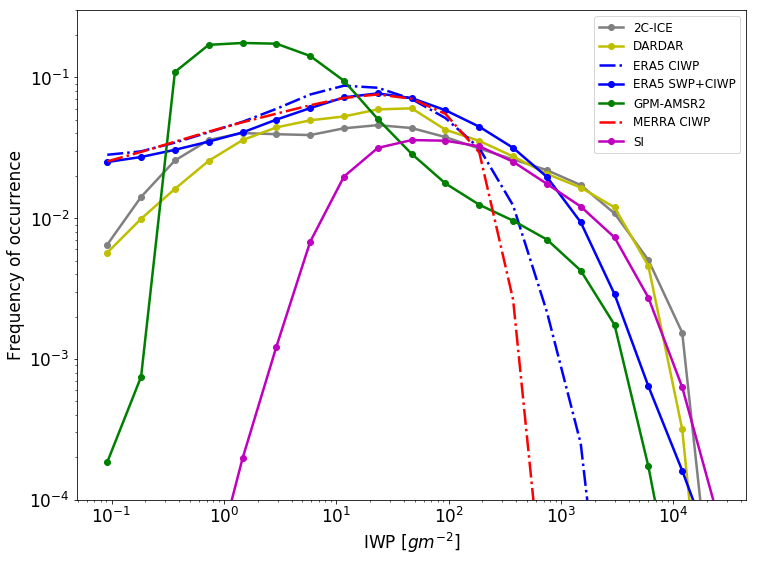

In [3]:
#binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2]\n",
#hist, bin_edges = np.histogram(iwp,bins=binz)\n",
fs = 17
lw = 2.5
fig = plt.figure(figsize=[12,9])
#ax = fig.add_subplot(111)
nsih = sih/np.sum(sih) 
ngpmh = gpmh/np.sum(gpmh)
nerah = erah/np.sum(erah)
nerach = erach/np.sum(erach)
nmerh = merh/np.sum(merh)
ndarh = darh/np.sum(darh)
n2ch = i2ch/np.sum(i2ch)
#print(np.sum(nsih),np.sum(ndarh))  ## all should be 1...
# but the shapes look kind of odd due to zeros and very low values??
#print(ngpmh)
plt.plot(pb[0:nb-1],n2ch[1:],'k-o',label='2C-ICE',linewidth=lw,c='grey')
plt.plot(pb[0:nb-1],ndarh[1:],'y-o',label='DARDAR',linewidth=lw)
plt.plot(pb[0:nb-1],nerach[1:],'b-.',label='ERA5 CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],nerah[1:],'b-o',label='ERA5 SWP+CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],ngpmh[0:],'g-o',label='GPM-AMSR2',linewidth=lw)
plt.plot(pb[0:nb-1],nmerh[1:],'r-.',label='MERRA CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],nsih[1:],'m-o',label='SI',linewidth=lw)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('IWP [$g m^{-2}$]',fontsize=fs)
plt.ylabel('Frequency of occurrence',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.title('IWP histo ')
axes = plt.gca()
axes.set_ylim([1e-4,3e-1])
plt.legend(fontsize=12)
plt.show()
fig.savefig('img/histo_v3.eps',bbox_inches='tight')#jpg',dpi=300)


In [4]:
# tried using different colorbar, was kinda eh
#import seaborn as sns
#sns.reset_orig()
#cs = sns.color_palette()

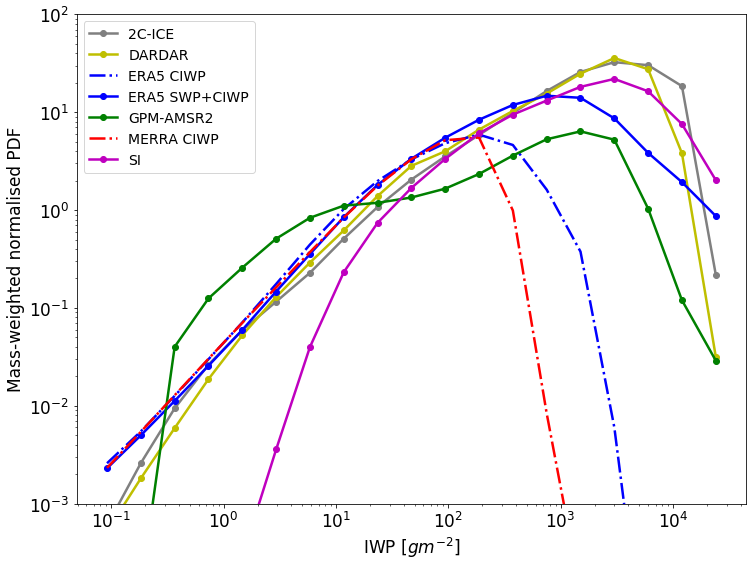

In [5]:
fig2 = plt.figure(figsize=[12,9])
#ax2 = fig.add_subplot(111)
# modify to show frequencies weighted by mass contribution (june 2018)
plt.plot(pb[0:nb-1],n2ch[1:]*pb[0:(nb-1)],'k-o',label='2C-ICE',linewidth=lw,c='grey')
plt.plot(pb[0:nb-1],ndarh[1:]*pb[0:(nb-1)],'y-o',label='DARDAR',linewidth=lw)
plt.plot(pb[0:nb-1],nerach[1:]*pb[0:(nb-1)],'b-.',label='ERA5 CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],nerah[1:]*pb[0:(nb-1)],'b-o',label='ERA5 SWP+CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],ngpmh[0:]*pb[0:(nb-1)],'g-o',label='GPM-AMSR2',linewidth=lw)
plt.plot(pb[0:nb-1],nmerh[1:]*pb[0:(nb-1)],'r-.',label='MERRA CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],nsih[1:]*pb[0:(nb-1)],'m-o',label='SI',linewidth=lw)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('IWP [$g m^{-2}$]',fontsize=fs)
plt.ylabel('Mass-weighted normalised PDF',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.title('IWP histo ')
axes = plt.gca()
axes.set_ylim([1e-3,1e2])
plt.legend(fontsize=14)
plt.show()
fig2.savefig('img/histo_v4.eps',bbox_inches='tight')#jpg',dpi=300)


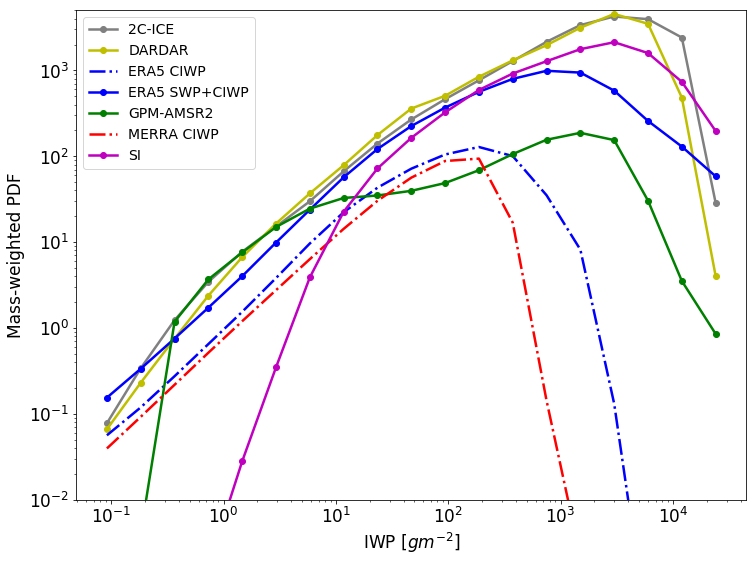

In [6]:
# last one, weighted by bins and also mean IWP (60N-60S, matching where counts come from in v2 data)
fig4 = plt.figure(figsize=[12,9])
# modify to show frequencies weighted by mass contribution (june 2018)
plt.plot(pb[0:nb-1],n2ch[1:]*pb[0:(nb-1)]*(126.8*1.03),'k-o',label='2C-ICE',linewidth=lw,c='grey')
plt.plot(pb[0:nb-1],ndarh[1:]*pb[0:(nb-1)]*126.8,'y-o',label='DARDAR',linewidth=lw)
plt.plot(pb[0:nb-1],nerach[1:]*pb[0:(nb-1)]*21.7,'b-.',label='ERA5 CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],nerah[1:]*pb[0:(nb-1)]*67.1,'b-o',label='ERA5 SWP+CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],ngpmh[0:]*pb[0:(nb-1)]*29.4,'g-o',label='GPM-AMSR2',linewidth=lw)
plt.plot(pb[0:nb-1],nmerh[1:]*pb[0:(nb-1)]*17.0,'r-.',label='MERRA CIWP',linewidth=lw)
plt.plot(pb[0:nb-1],nsih[1:]*pb[0:(nb-1)]*97.2,'m-o',label='SI',linewidth=lw)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('IWP [$g m^{-2}$]',fontsize=fs)
plt.ylabel('Mass-weighted PDF',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.title('IWP histo ')
axes = plt.gca()
axes.set_ylim([1e-2,5e3])
plt.legend(fontsize=14)
plt.show()
fig2.savefig('img/histo_v6.eps',bbox_inches='tight')#jpg',dpi=300)


<class 'numpy.ndarray'>


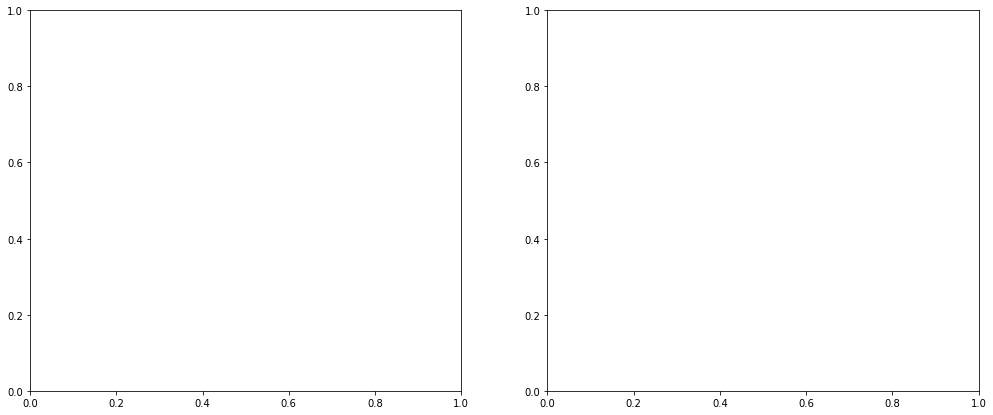

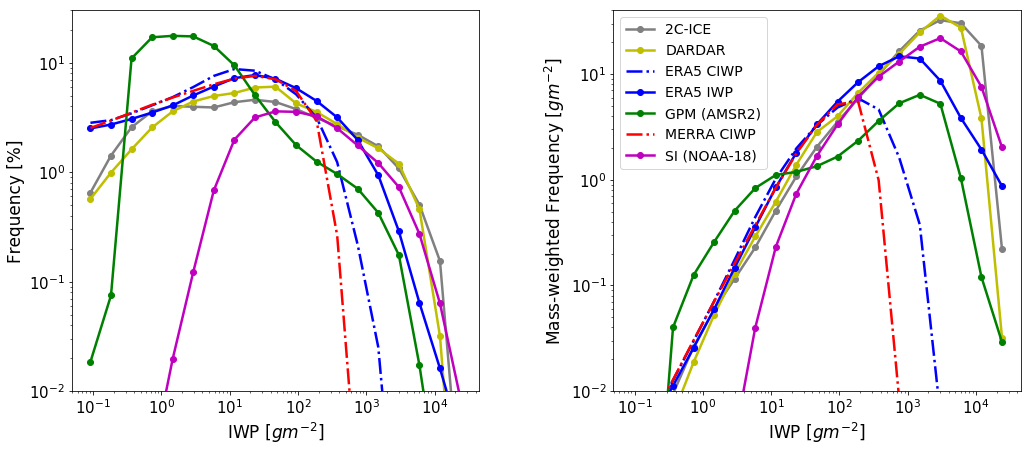

In [8]:
fg,ax = plt.subplots(nrows=1, ncols=2, figsize=[17,7])
print(type(ax))
plt.subplots_adjust(wspace=0.33)
#fig,ax = plt.subplots(2,sharex=True,figsize=[9,15]) #nrows=1, ncols=2, figsize=[15,9])
ax[1].plot(pb[0:nb-1],n2ch[1:]*pb[0:(nb-1)],'k-o',label='2C-ICE',linewidth=lw,c='grey')
ax[1].plot(pb[0:nb-1],ndarh[1:]*pb[0:(nb-1)],'y-o',label='DARDAR',linewidth=lw)
ax[1].plot(pb[0:nb-1],nerach[1:]*pb[0:(nb-1)],'b-.',label='ERA5 CIWP',linewidth=lw)
ax[1].plot(pb[0:nb-1],nerah[1:]*pb[0:(nb-1)],'b-o',label='ERA5 IWP',linewidth=lw)
ax[1].plot(pb[0:nb-1],ngpmh[0:]*pb[0:(nb-1)],'g-o',label='GPM (AMSR2)',linewidth=lw)
ax[1].plot(pb[0:nb-1],nmerh[1:]*pb[0:(nb-1)],'r-.',label='MERRA CIWP',linewidth=lw)
ax[1].plot(pb[0:nb-1],nsih[1:]*pb[0:(nb-1)],'m-o',label='SI (NOAA-18)',linewidth=lw)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('IWP [$g m^{-2}$]',fontsize=fs)
ax[1].set_ylabel('Mass-weighted Frequency [$g m^{-2}$]',fontsize=fs)
ax[1].set_ylim([1e-2,4e1])
ax[1].tick_params(axis='both',labelsize=fs-2)
ax[1].legend(fontsize=14)
ax[0].plot(pb[0:nb-1],100*n2ch[1:],'k-o',label='2C-ICE',linewidth=lw,c='grey')
ax[0].plot(pb[0:nb-1],100*ndarh[1:],'y-o',label='DARDAR',linewidth=lw)
ax[0].plot(pb[0:nb-1],100*nerach[1:],'b-.',label='ERA5 CIWP',linewidth=lw)
ax[0].plot(pb[0:nb-1],100*nerah[1:],'b-o',label='ERA5 IWP',linewidth=lw)
ax[0].plot(pb[0:nb-1],100*ngpmh[0:],'g-o',label='GPM (AMSR2)',linewidth=lw)
ax[0].plot(pb[0:nb-1],100*nmerh[1:],'r-.',label='MERRA CIWP',linewidth=lw)
ax[0].plot(pb[0:nb-1],100*nsih[1:],'m-o',label='SI (NOAA-18)',linewidth=lw)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel('IWP [$g m^{-2}$]',fontsize=fs)
ax[0].set_ylabel('Frequency [%]',fontsize=fs)
ax[0].set_ylim([1e-2,3e1])
ax[0].tick_params(axis='both',labelsize=fs-2)
plt.show()
fg.savefig('img/histo_2pan_v1.eps',bbox_inches='tight')#jpg',dpi=300)

In [ ]:
f=16
p=6
print(np.size(pb))
print(pb[f:(nb-1)])
print('ERA5: ',np.sum(nerah[f+1:]*pb[f:(nb-1)]),np.sum(nerah[f+1:]))
print('DAR: ', np.sum(ndarh[f+1:]*pb[f:(nb-1)]),np.sum(ndarh[f+1:]))
print('2C: ',  np.sum(n2ch[f+1:]*pb[f:(nb-1)]),np.sum(n2ch[f+1:]))
print('SI: ',  np.sum(nsih[f+1:]*pb[f:(nb-1)]),np.sum(nsih[f+1:]))
print('GPM: ', np.sum(ngpmh[f:]*pb[f:(nb-1)]),np.sum(ngpmh[f:]))

f=0
print('ERA5: ',np.sum(nerah[f+1:(nb-p)]*pb[f:(nb-1-p)]))#,np.sum(nerah[f+1:]))
print('MERRA:',np.sum(nmerh[f+1:(nb-p)]*pb[f:(nb-1-p)]))#,np.sum(nerah[f+1:]))
print('DAR: ', np.sum(ndarh[f+1:(nb-p)]*pb[f:(nb-1-p)]))##,np.sum(ndarh[f+1:]))
print('2C: ',  np.sum(n2ch[f+1:(nb-p)]*pb[f:(nb-1-p)]))##,np.sum(n2ch[f+1:]))
print('SI: ',  np.sum(nsih[f+1:(nb-p)]*pb[f:(nb-1-p)]))#,np.sum(nsih[f+1:]))
print('GPM: ', np.sum(ngpmh[f:(nb-1-p)]*pb[f:(nb-1-p)]))#,np.sum(ngpmh[f:]))